In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
haberman_data = pd.read_csv('datasets_474_966_haberman-1.csv', header=None)

In [4]:
haberman_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman_data.rename(index=str, columns={0: "age", 1: "op_yr", 2: "ax", 3: "status"}, inplace = True)

In [6]:
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
haberman_data.shape

(306, 4)

In [8]:
haberman_data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [9]:
haberman_data['status'] = haberman_data['status'].map({1:'Survived', 2:"Not_Survived"})

In [10]:
print("the percentage of people that survived the surgery ", (haberman_data['status'].value_counts()[0] / haberman_data['status'].count()) *100)

print("the percentage of people that did not survive survived the surgery ", (haberman_data['status'].value_counts()[1] / haberman_data['status'].count()) *100)

the percentage of people that survived the surgery  73.52941176470588
the percentage of people that did not survive survived the surgery  26.47058823529412


In [11]:
haberman_data.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF52F4FD0>]],
      dtype=object)

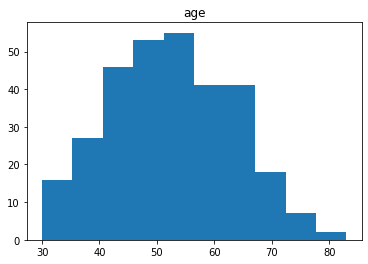

In [12]:
haberman_data.hist(column='age', grid=False)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

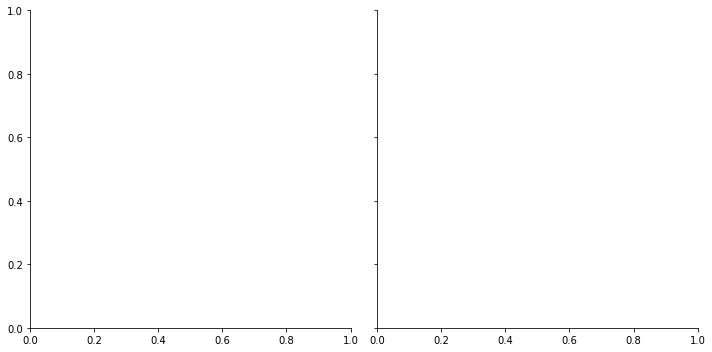

In [35]:
a = sns.FacetGrid(haberman_data, col='status', height=5)
a.map(sns.distplot, 'status')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF650BAC8>]],
      dtype=object)

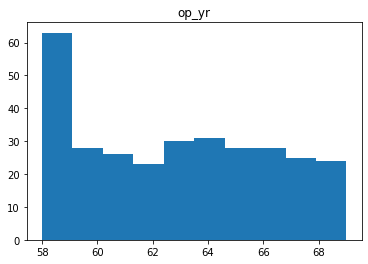

In [14]:
haberman_data.hist(column='op_yr', grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF6587EF0>]],
      dtype=object)

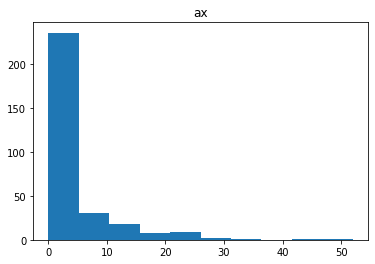

In [15]:
haberman_data.hist(column='ax', grid=False)

In [16]:
haberman_data_survived = haberman_data.loc[haberman_data['status'] == 'Survived']
haberman_data_not_survived = haberman_data.loc[haberman_data['status'] == 'Not_Survived']

In [17]:
density_age_survived, bin_edges_age_survived = np.histogram(
    haberman_data_survived['age'],
    bins = 10,
    density = True)

pdf_age_survived = (density_age_survived)/(sum(density_age_survived))

In [18]:
density_age_not_survived, bin_edges_age_not_survived = np.histogram(
    haberman_data_not_survived['age'],
    bins = 10,
    density = True)

pdf_age_not_survived = (density_age_not_survived)/(sum(density_age_not_survived))

In [19]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_edges_age_not_survived))
print("PDF Not Survived : {}\n".format(pdf_age_not_survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [20]:
cdf_Age_Not_Survived=np.cumsum(pdf_age_not_survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

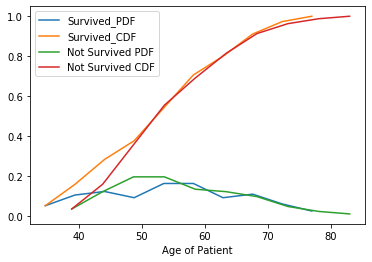

In [21]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_edges_age_not_survived[1:],pdf_age_not_survived)
plt.plot(bin_edges_age_not_survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])